In [41]:
# Imports required for the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Silence warnings for clarity in the notebook
import warnings
warnings.filterwarnings('ignore')

print('Notebook imports loaded')

Notebook imports loaded


# Data Cleaning - Regression of Used Car Prices

In [42]:
# Instalación silenciosa de missingno (compatible fuera de IPython)
import sys
import subprocess

try:
    import missingno as msno
except ImportError:
    subprocess.run([sys.executable, "-m", "pip", "install", "missingno"], check=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    import missingno as msno


###Importamos las librerías necesarias para realiar nuestro procesamiento y limpieza de datos

In [43]:
# Importamos las librerías ensenciales
import pandas as pd # Para manejo de datos
import numpy as np # Para operaciones numéricas
import plotly as pl # Para visualizaciones interactivas
import seaborn as sns # Para gráficos estadísticos
import missingno as msno # Para visualizar datos faltantes

#1. Cargamos el dataset


In [ ]:
# Carga del csv a dataframe
df_train = pd.read_csv('../data/raw/train.csv')
df_test = pd.read_csv('../data/raw/test.csv')

In [45]:
# Mostramos las primeras filas
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [46]:
# Mostramos las primeras filas
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [47]:
# Voy a obtener un registro para ver y entender todos los valores de cada columna
record = df_train.iloc[0] # obtengo el primer registro
print(record)

id                                                         0
brand                                                   MINI
model                                          Cooper S Base
model_year                                              2007
milage                                                213000
fuel_type                                           Gasoline
engine          172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel
transmission                                             A/T
ext_col                                               Yellow
int_col                                                 Gray
accident                                       None reported
clean_title                                              Yes
price                                                   4200
Name: 0, dtype: object


In [48]:
#Info general del dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [50]:
#Ver forma del dataframe
df_train.shape, df_test.shape #filas, columnas

((188533, 13), (125690, 12))

In [51]:
#Datos estadísticos para datos numéricos
df_train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


#2. Exploración de los tipos de datos
Antes de comenzar con cualquier análisis exploratorio, es fundamental examinar los tipos de datos de cada columna del dataset.
Esto nos permitirá:

Verificar que los campos tengan el tipo de dato correcto
Detectar columnas que requieran conversión (por ejemplo, fechas)
Identificar variables numéricas, categóricas y temporales
Anticipar posibles problemas durante el análisis estadístico
Para ello, utilizamos las funciones df_train.dtypes y df_train.info(), que proporcionan una visión general de la estructura del DataFrame.

In [52]:
print("Tipo de dato para cada columna:")
print(df_train.dtypes)

Tipo de dato para cada columna:
id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object


Para este proyecto hemos decidido convertir los tipos de datos object en category, ya que tenemos valores repetidos y nos servirá para entrenar el modelo de forma más óptima

In [53]:
# Obtenemos una lista de las columnas que queremos cambiar su tipo
cat_cols = [
    'brand','model','fuel_type','transmission',
    'ext_col','int_col','accident','clean_title'
]
# Cambiamos el tipo a category
df_train[cat_cols] = df_train[cat_cols].astype('category')

df_test[cat_cols] = df_test[cat_cols].astype('category')

df_train.info(), df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            188533 non-null  int64   
 1   brand         188533 non-null  category
 2   model         188533 non-null  category
 3   model_year    188533 non-null  int64   
 4   milage        188533 non-null  int64   
 5   fuel_type     183450 non-null  category
 6   engine        188533 non-null  object  
 7   transmission  188533 non-null  category
 8   ext_col       188533 non-null  category
 9   int_col       188533 non-null  category
 10  accident      186081 non-null  category
 11  clean_title   167114 non-null  category
 12  price         188533 non-null  int64   
dtypes: category(8), int64(4), object(1)
memory usage: 9.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtyp

(None, None)

Análisis de valores faltantes o nulos


In [54]:
# df_train.count() Podemos ver los valores no nulos de cada columna
df_train.count(), df_test.count()

(id              188533
 brand           188533
 model           188533
 model_year      188533
 milage          188533
 fuel_type       183450
 engine          188533
 transmission    188533
 ext_col         188533
 int_col         188533
 accident        186081
 clean_title     167114
 price           188533
 dtype: int64,
 id              125690
 brand           125690
 model           125690
 model_year      125690
 milage          125690
 fuel_type       122307
 engine          125690
 transmission    125690
 ext_col         125690
 int_col         125690
 accident        124058
 clean_title     111451
 dtype: int64)

In [55]:
missing = df_train.isna().sum().sort_values(ascending=False) # Sumamos los valores nulos y los ordenamos de mayor a menor
missing_pct = (missing / len(df_train)) * 100 # Sacamos el porcentaje del total

pd.DataFrame({"missing": missing, "percent": missing_pct})


,missing,percent
clean_title,21419,11.360876
fuel_type,5083,2.696080
accident,2452,1.300568
brand,0,0.000000
id,0,0.000000
milage,0,0.000000
model_year,0,0.000000
model,0,0.000000
engine,0,0.000000
ext_col,0,0.000000


In [56]:
missing = df_test.isna().sum().sort_values(ascending=False) # Sumamos los valores nulos y los ordenamos de mayor a menor
missing_pct = (missing / len(df_test)) * 100 # Sacamos el porcentaje del total

pd.DataFrame({"missing": missing, "percent": missing_pct})


,missing,percent
clean_title,14239,11.328666
fuel_type,3383,2.691543
accident,1632,1.298433
id,0,0.000000
model_year,0,0.000000
model,0,0.000000
brand,0,0.000000
milage,0,0.000000
transmission,0,0.000000
engine,0,0.000000


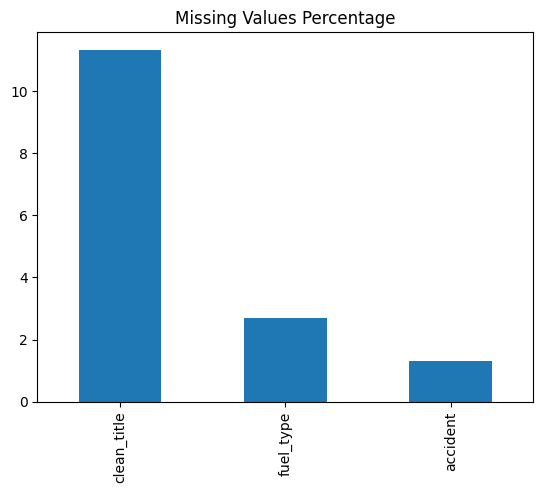

In [57]:
import matplotlib.pyplot as plt

# Mostramos
missing_pct[missing_pct > 0].plot(kind='bar')
plt.title("Missing Values Percentage")
plt.show()


Al solo tener solo 3 campos con datos faltantes y solo clean_title llega al 11 % hemos decidido imputar los datos, rellenando los valores faltantes por:

-clean_tittle 11% : "Unknown" -> (Yes,No,Unkown)

-fuel_type 2.7% : se rellenara con el valor más popular

-accident 1.3%: "Unknown"

Esto nos permite no dropear filas y perder datos valiosos para nuestro estudio

## Cambio de tipo en df_train

In [58]:
# For clean_title
df_train['clean_title'] = df_train['clean_title'].cat.add_categories('Unknown')
df_train['clean_title'] = df_train['clean_title'].fillna('Unknown')

#Como obtener el valor más populas
# If your data has:
# Gasoline: 100,000 cars
# Diesel: 50,000 cars
# Electric: 30,000 cars
# Hybrid: 8,000 cars

df_train['fuel_type'].mode()     # Returns: 0    Gasoline (Series)
df_train['fuel_type'].mode()[0]  # Returns: Gasoline (string)

# For fuel_type
most_common_fuel = df_train['fuel_type'].mode()[0] # Guardamos el valor mas popular
df_train['fuel_type'] = df_train['fuel_type'].fillna(most_common_fuel) # Rellenamos los valores faltantes

# For accident
df_train['accident'] = df_train['accident'].cat.add_categories('Unknown')
df_train['accident'] = df_train['accident'].fillna('Unknown')

## Cambio de tipo en df_test

In [59]:
# For clean_title
df_test['clean_title'] = df_test['clean_title'].cat.add_categories('Unknown')
df_test['clean_title'] = df_test['clean_title'].fillna('Unknown')

#Como obtener el valor más populas
# If your data has:
# Gasoline: 100,000 cars
# Diesel: 50,000 cars
# Electric: 30,000 cars
# Hybrid: 8,000 cars

df_test['fuel_type'].mode()     # Returns: 0    Gasoline (Series)
df_test['fuel_type'].mode()[0]  # Returns: Gasoline (string)

# For fuel_type
most_common_fuel = df_test['fuel_type'].mode()[0] # Guardamos el valor mas popular
df_test['fuel_type'] = df_test['fuel_type'].fillna(most_common_fuel) # Rellenamos los valores faltantes

# For accident
df_test['accident'] = df_test['accident'].cat.add_categories('Unknown')
df_test['accident'] = df_test['accident'].fillna('Unknown')

In [60]:
# Check for exact duplicates no existen duplicados
duplicates_train = df_train.duplicated()
duplicates_test = df_test.duplicated()
print(f"Exact duplicates_train: {duplicates_train.sum()} , Exact duplicates_train: {duplicates_test.sum()} ")

Exact duplicates_train: 0 , Exact duplicates_train: 0 


##Añadiendo la columna "car_age"
En este paso hemos decidido añadir una columna nueva, donde obtendremos el tiempo que lleva un coche en el mercado

In [61]:
from datetime import datetime # Importación de las librerias para obtener la fecha

current_year = datetime.now().year # Guardamos la fecha en una variable
df_train['car_age'] = current_year - df_train['model_year'] # Creamos una columna donde restamos a la fecha actual el año del modelo del coche
df_test['car_age'] = current_year - df_test['model_year'] # Creamos una columna donde restamos a la fecha actual el año del modelo del coche
# Verify it worked
print(df_train[['model_year', 'car_age']].head())
print(f"\nCar age range: {df_train['car_age'].min()} to {df_train['car_age'].max()} years")

   model_year  car_age
0        2007       19
1        2002       24
2        2002       24
3        2017        9
4        2021        5

Car age range: 2 to 52 years


#Tratamiento de la Columna Engine
Se realizó un proceso de limpieza y transformación de la columna engine, la cual contenía información combinada en formato de texto. Mediante el uso de expresiones regulares, se extrajeron tres variables numéricas relevantes para el modelado: potencia del motor (horsepower), tamaño del motor en litros, y número de cilindros.

🔍 Inspección de la Columna Engine

Se visualizaron las primeras filas de la columna engine para identificar el formato del texto y determinar qué variables podían extraerse posteriormente.



In [62]:
df_train['engine'].head()

0         172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel
1         252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel
2    320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...
3         420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel
4         208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
Name: engine, dtype: object

Se calculó el número de valores únicos en la columna engine para evaluar la diversidad de formatos y la complejidad del proceso de extracción


In [63]:
print(f"Number of unique values in 'engine' column: {df_train['engine'].nunique()}")

Number of unique values in 'engine' column: 1117


Se analizaron los valores más frecuentes de la columna engine junto con sus conteos para identificar patrones comunes y variaciones en el formato del texto.



In [64]:
print("Most frequent unique values in 'engine' column:")
print(df_train['engine'].value_counts().head(10))

Most frequent unique values in 'engine' column:
engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             2841
2.0L I4 16V GDI DOHC Turbo                               2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel            2451
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel            2436
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             2187
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             2138
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    2134
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    2084
Name: count, dtype: int64


Se definió una expresión regular para identificar valores numéricos seguidos de “HP” y se aplicó sobre la columna engine para extraer la potencia del motor en una nueva variable numérica.


In [65]:
import re

# Expresión regular para buscar números seguidos de 'HP'
# Captura valores como: 172HP o 172.5HP
pattern_hp = r'(\d+\.?\d*)HP'

# Extraemos el valor de horsepower desde la columna 'engine'
# str.extract devuelve solo el número encontrado gracias al paréntesis ()
# [0] selects the first (and only) capturing group.
df_train['horsepower'] = df_train['engine'].str.extract(pattern_hp)[0]
df_test['horsepower'] = df_test['engine'].str.extract(pattern_hp)[0]

# Convertimos la columna a tipo numérico
# Si algún valor no se puede convertir, se convierte en NaN
df_train['horsepower'] = pd.to_numeric(df_train['horsepower'], errors='coerce')
df_test['horsepower'] = pd.to_numeric(df_test['horsepower'], errors='coerce')

# Mostramos las primeras filas para verificar que se extrajo correctamente
print("DataFrame head with extracted horsepower:")
print(df_train[['engine', 'horsepower']].head())

DataFrame head with extracted horsepower:
                                              engine  horsepower
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel       172.0
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel       252.0
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...       320.0
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel       420.0
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel       208.0


Se verificó la cantidad de valores faltantes en la nueva columna horsepower y se calcularon estadísticas descriptivas para analizar su distribución y valores centrales, lo que permite evaluar la calidad de la extracción y decidir cómo tratar los datos faltantes.



In [66]:
print("Missing values in 'horsepower' column:")
print(df_train['horsepower'].isnull().sum())

print("\nDescriptive statistics for 'horsepower' column:")
print(df_train['horsepower'].describe())

Missing values in 'horsepower' column:
33259

Descriptive statistics for 'horsepower' column:
count    155274.000000
mean        343.263856
std         114.734210
min          70.000000
25%         263.000000
50%         329.000000
75%         416.000000
max        1020.000000
Name: horsepower, dtype: float64


El siguiente paso es extraer el tamaño del motor en litros de la columna 'engine' utilizando expresiones regulares. Esto implicará crear una nueva columna numérica para este dato, manejar los posibles valores faltantes convirtiendo los errores a 'NaN' y, finalmente, verificar la extracción mostrando las primeras filas del DataFrame. Todo esto se hace para cumplir con el requisito principal de la tarea de extraer información estructurada como el tamaño del motor



In [67]:
import re

# Patrón para capturar números seguidos de 'L' (litros)
pattern_engine_size = r'(\d+\.?\d*)L'

# Extraer tamaño del motor y crear nueva columna
df_train['engine_size_L'] = df_train['engine'].str.extract(pattern_engine_size)[0]
df_test['engine_size_L'] = df_test['engine'].str.extract(pattern_engine_size)[0]

# Convertir a número, valores inválidos se vuelven NaN
df_train['engine_size_L'] = pd.to_numeric(df_train['engine_size_L'], errors='coerce')
df_test['engine_size_L'] = df_test['engine'].str.extract(pattern_engine_size)[0]

# Verificar extracción mostrando las primeras filas
print("DataFrame head with extracted engine size (Liters):")
print(df_train[['engine', 'engine_size_L']].head())

DataFrame head with extracted engine size (Liters):
                                              engine  engine_size_L
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel            1.6
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel            3.9
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...            5.3
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel            5.0
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel            2.0


Ahora que hemos extraído 'engine_size_L', necesitamos revisar si hay valores faltantes para saber cuántos registros no tienen información del tamaño del motor y mostrar estadísticas descriptivas (como promedio, mínimo, máximo y desviación) para entender la distribución y completitud de los datos, de manera similar a cómo se analizó la columna 'horsepower'


In [68]:
print("Missing values in 'engine_size_L' column:")
print(df_train['engine_size_L'].isnull().sum())

print("\nDescriptive statistics for 'engine_size_L' column:")
print(df_train['engine_size_L'].describe())

Missing values in 'engine_size_L' column:
14214

Descriptive statistics for 'engine_size_L' column:
count    174319.000000
mean          3.806676
std           1.355945
min           0.650000
25%           3.000000
50%           3.500000
75%           4.800000
max           8.400000
Name: engine_size_L, dtype: float64


A continuación, necesitamos extraer el número de cilindros desde la columna 'engine' usando expresiones regulares, crear una nueva columna numérica para almacenar ese dato, manejar posibles valores faltantes convirtiéndolos en NaN si hay errores, y finalmente verificar la extracción mostrando las primeras filas del DataFrame, tal como se requiere para obtener información estructurada como el número de cilindros.


In [69]:
import re

# Patrón para capturar números seguidos de la palabra 'Cylinder'
# Busca uno o más dígitos antes de 'Cylinder'; los paréntesis capturan solo el número.
pattern_cylinders = r'(\d+)\s*Cylinder'

# Extraer el número de cilindros de la columna 'engine' y crear nueva columna
df_train['cylinders'] = df_train['engine'].str.extract(pattern_cylinders)[0]
df_test['cylinders'] = df_test['engine'].str.extract(pattern_cylinders)[0]

# Convertir la columna 'cylinders' a tipo numérico; valores inválidos se vuelven NaN
df_train['cylinders'] = pd.to_numeric(df_train['cylinders'], errors='coerce')
df_test['cylinders'] = df_test['engine'].str.extract(pattern_cylinders)[0]

# Verificar la extracción mostrando las primeras filas
print("DataFrame head with extracted number of cylinders:")
print(df_train[['engine', 'cylinders']].head())

DataFrame head with extracted number of cylinders:
                                              engine  cylinders
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel        4.0
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel        8.0
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...        8.0
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel        8.0
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel        4.0


Ahora que hemos extraído 'cylinders', necesitamos revisar si hay valores faltantes para identificar registros sin información del número de cilindros y mostrar estadísticas descriptivas (como promedio, mínimo, máximo y desviación) para entender la distribución y completitud de los datos, de manera similar a cómo se analizaron las columnas 'horsepower' y 'engine_size_L'



In [70]:
print("Missing values in 'cylinders' column:")
print(df_train['cylinders'].isnull().sum())

print("\nDescriptive statistics for 'cylinders' column:")
print(df_train['cylinders'].describe())

Missing values in 'cylinders' column:
37855

Descriptive statistics for 'cylinders' column:
count    150678.000000
mean          6.374268
std           1.554579
min           3.000000
25%           6.000000
50%           6.000000
75%           8.000000
max          12.000000
Name: cylinders, dtype: float64


Necesito visualizar la distribución de las nuevas columnas numéricas extraídas: 'horsepower', 'engine_size_L' y 'cylinders', para comprender sus características, tal como solicita la tarea principal. Para esto, los histogramas son la herramienta más adecuada.



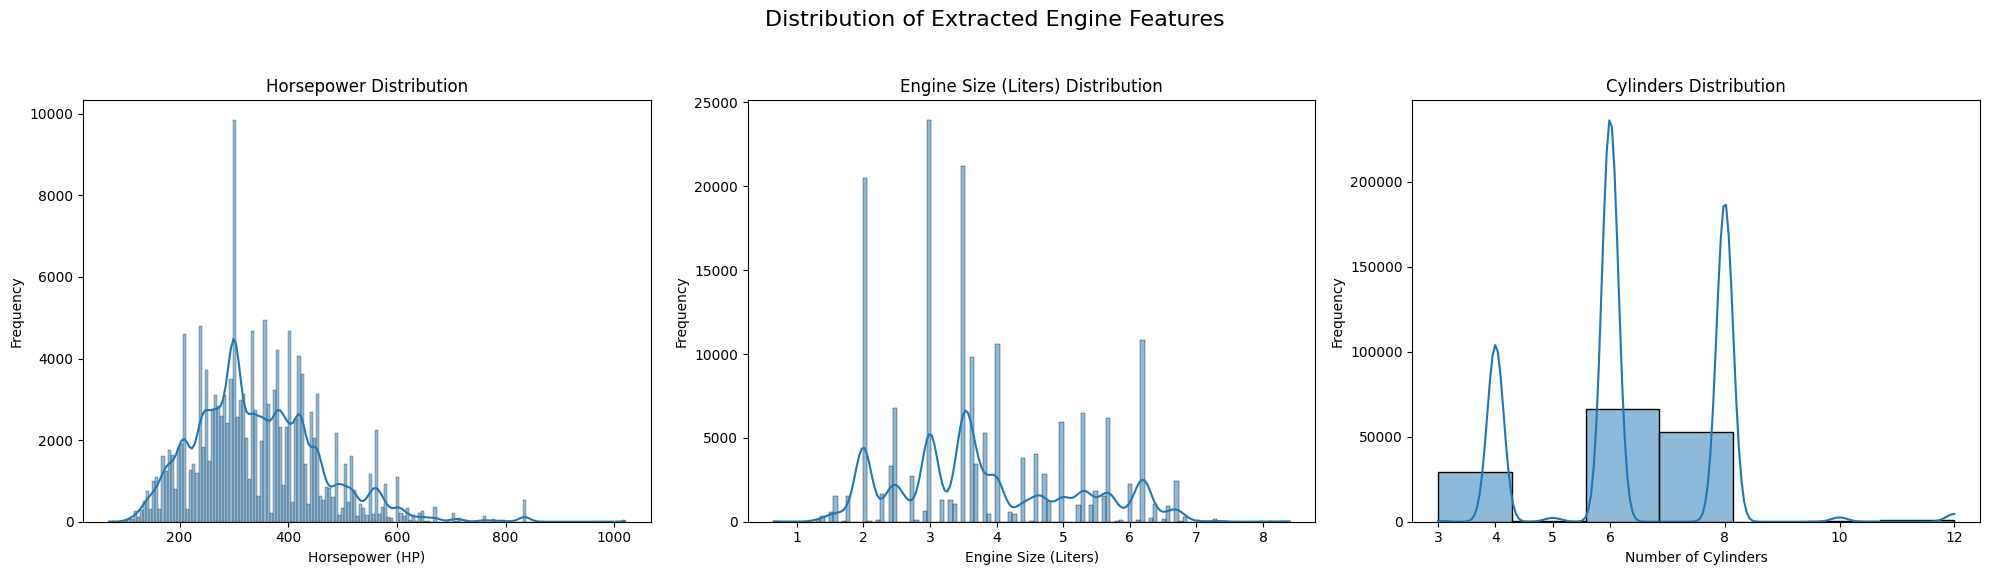

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Extracted Engine Features', fontsize=16)

# Plot distribution of horsepower
sns.histplot(df_train['horsepower'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Horsepower Distribution')
axes[0].set_xlabel('Horsepower (HP)')
axes[0].set_ylabel('Frequency')

# Plot distribution of engine_size_L
sns.histplot(df_train['engine_size_L'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Engine Size (Liters) Distribution')
axes[1].set_xlabel('Engine Size (Liters)')
axes[1].set_ylabel('Frequency')

# Plot distribution of cylinders
sns.histplot(df_train['cylinders'].dropna(), kde=True, ax=axes[2], bins=len(df_train['cylinders'].unique())-1)
axes[2].set_title('Cylinders Distribution')
axes[2].set_xlabel('Number of Cylinders')
axes[2].set_ylabel('Frequency')
axes[2].set_xticks(sorted(df_train['cylinders'].dropna().unique()))

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

Resumen de la Extracción y Limpieza de las Características del Motor

En esta sección nos centramos en extraer y limpiar características numéricas de la columna engine del DataFrame df_train. El proceso incluyó los siguientes pasos clave:

Exploración de la columna 'engine': Se analizó inicialmente la columna 'engine', que es de tipo texto y contiene información de potencia (horsepower), tamaño del motor y número de cilindros. Se observó una gran cantidad de valores únicos, lo que requería una estrategia de extracción robusta.

Extracción de Horsepower: Se usaron expresiones regulares para identificar y extraer los valores numéricos que aparecen justo antes de 'HP'. Luego se convirtieron a tipo numérico, convirtiendo los errores en NaN. Se revisaron los valores faltantes y estadísticas descriptivas para entender la completitud y distribución de los datos.

Extracción del Tamaño del Motor (Litros): De manera similar a la potencia, se emplearon expresiones regulares para extraer los números seguidos de 'L'. Se convirtieron a tipo numérico, y se analizaron los valores faltantes y estadísticas descriptivas.

Extracción del Número de Cilindros: Se utilizaron expresiones regulares para extraer los valores numéricos antes de 'Cylinder'. Estos valores se convirtieron a tipo numérico y se revisó su completitud y distribución mediante conteo de valores faltantes y estadísticas descriptivas.

Visualización de Distribuciones: Finalmente, se generaron histogramas para cada columna numérica nueva ('horsepower', 'engine_size_L' y 'cylinders') para inspeccionar visualmente sus distribuciones, identificar posibles valores atípicos y comprender sus características generales.

## Manejar Valores Faltantes en Nuevas Columnas



Necesito calcular la mediana de cada una de las nuevas columnas numéricas ('horsepower', 'engine_size_L' y 'cylinders') y luego usar estas medianas para llenar los valores faltantes en sus respectivas columnas, siguiendo las instrucciones iniciales. Finalmente, se verificará la imputación revisando si todavía existen valores nulos.



In [72]:
print("Filling missing values with median for 'horsepower', 'engine_size_L', and 'cylinders'...")

# Calculate the median for each column
median_horsepower = df_train['horsepower'].median()
median_engine_size_L = df_train['engine_size_L'].median()
median_cylinders = df_train['cylinders'].median()

# Fill NaN values with the calculated medians
df_train['horsepower'] = df_train['horsepower'].fillna(median_horsepower)
df_train['engine_size_L'] = df_train['engine_size_L'].fillna(median_engine_size_L)
df_train['cylinders'] = df_train['cylinders'].fillna(median_cylinders)

# Ensure df_test columns are numeric before calculating medians
df_test['horsepower'] = pd.to_numeric(df_test['horsepower'], errors='coerce')
df_test['engine_size_L'] = pd.to_numeric(df_test['engine_size_L'], errors='coerce')
df_test['cylinders'] = pd.to_numeric(df_test['cylinders'], errors='coerce')

# Calculate the median for each column
median_horsepower = df_test['horsepower'].median()
median_engine_size_L = df_test['engine_size_L'].median()
median_cylinders = df_test['cylinders'].median()

# Fill NaN values with the calculated medians
df_test['horsepower'] = df_test['horsepower'].fillna(median_horsepower)
df_test['engine_size_L'] = df_test['engine_size_L'].fillna(median_engine_size_L)
df_test['cylinders'] = df_test['cylinders'].fillna(median_cylinders)

print(f"Missing values in 'df_train.horsepower' after imputation: {df_train['horsepower'].isnull().sum()}")
print(f"Missing values in 'df_train.engine_size_L' after imputation: {df_train['engine_size_L'].isnull().sum()}")
print(f"Missing values in 'df_train.cylinders' after imputation: {df_train['cylinders'].isnull().sum()}")

print(f"Missing values in 'df_test.horsepower' after imputation: {df_test['horsepower'].isnull().sum()}")
print(f"Missing values in 'df_test.engine_size_L' after imputation: {df_test['engine_size_L'].isnull().sum()}")
print(f"Missing values in 'df_test.cylinders' after imputation: {df_test['cylinders'].isnull().sum()}")


Filling missing values with median for 'horsepower', 'engine_size_L', and 'cylinders'...
Missing values in 'df_train.horsepower' after imputation: 0
Missing values in 'df_train.engine_size_L' after imputation: 0
Missing values in 'df_train.cylinders' after imputation: 0
Missing values in 'df_test.horsepower' after imputation: 0
Missing values in 'df_test.engine_size_L' after imputation: 0
Missing values in 'df_test.cylinders' after imputation: 0


## Visualizar Nuevas Características




Necesito crear una visualización completa de la distribución de las columnas 'horsepower', 'engine_size_L' y 'cylinders', incluyendo histogramas y diagramas de caja (boxplots), para evaluar sus distribuciones e identificar posibles valores atípicos, siguiendo las instrucciones de la subtarea.



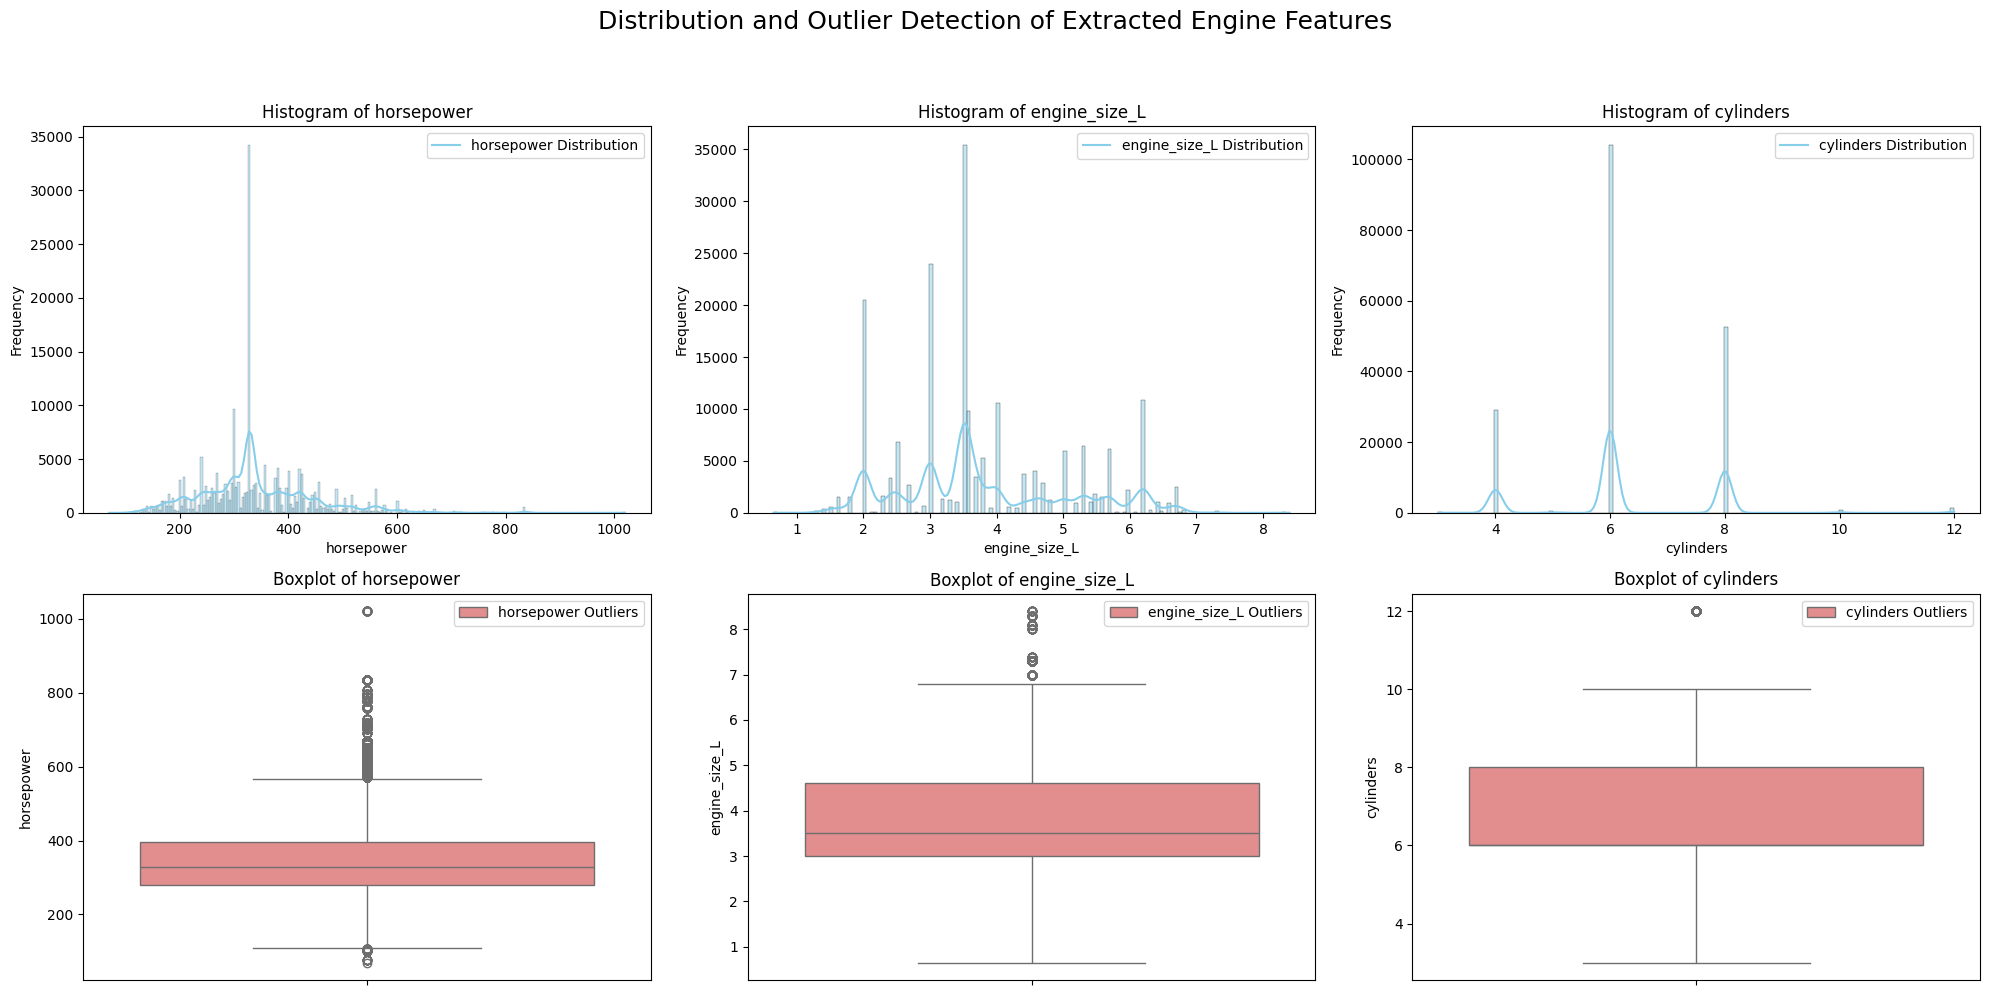

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
features = ['horsepower', 'engine_size_L', 'cylinders']

# Set up the figure and axes for 2 rows (histograms and boxplots) and 3 columns (for each feature)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle('Distribution and Outlier Detection of Extracted Engine Features', fontsize=18, y=1.02)

for i, feature in enumerate(features):
    # Histogram with KDE in the first row
    sns.histplot(df_train[feature], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Histogram of {feature}')
    axes[0, i].set_xlabel(feature)
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].legend([f'{feature} Distribution'], loc='upper right')

    # Boxplot in the second row
    sns.boxplot(y=df_train[feature], ax=axes[1, i], color='lightcoral')
    axes[1, i].set_title(f'Boxplot of {feature}')
    axes[1, i].set_ylabel(feature)
    axes[1, i].legend([f'{feature} Outliers'], loc='upper right')

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust rect to make space for suptitle
plt.show()

## Resumen de la Extracción y Limpieza de Características del Motor

Esta sección se centró en la extracción y limpieza de características numéricas de la columna `engine` en el DataFrame `df_train`. El proceso involucró los siguientes pasos clave:

1.  **Exploración de la columna 'engine'**: Un análisis inicial de la columna 'engine' reveló su naturaleza basada en cadenas de texto, que contenía información sobre la potencia (HP), el tamaño del motor (Litros) y el número de cilindros. Se observó un gran número de valores únicos, lo que exigió una estrategia de extracción robusta.

2.  **Extracción de Caballos de Fuerza (HP)**: Se utilizaron expresiones regulares para identificar y extraer los valores numéricos que precedían inmediatamente a 'HP'. Los valores extraídos se convirtieron luego a un tipo de dato numérico, donde los errores se coercionaron a `NaN`. Se revisaron los valores faltantes y las estadísticas descriptivas para comprender la completitud y distribución de los datos.

3.  **Extracción del Tamaño del Motor (Litros)**: De manera similar a la potencia, se emplearon expresiones regulares para extraer los valores numéricos seguidos de 'L' (para Litros). Estos se convirtieron a un tipo numérico, y se examinaron los valores faltantes junto con las estadísticas descriptivas.

4.  **Extracción del Número de Cilindros**: Nuevamente se utilizaron expresiones regulares para extraer los valores numéricos que precedían a 'Cylinder'. Los valores extraídos se convirtieron a un tipo de dato numérico, y su completitud y distribución se analizaron mediante el recuento de valores faltantes y las estadísticas descriptivas.

5.  **Manejo de Valores Faltantes en Nuevas Columnas**: Se calculó la mediana para cada una de las nuevas columnas numéricas ('horsepower', 'engine_size_L', 'cylinders') y se utilizó para rellenar los valores faltantes en sus respectivas columnas. Esto aseguró que no hubiera valores nulos en estas características, lo que es crucial para el análisis y modelado subsiguientes.

6.  **Visualización de Distribuciones**: Finalmente, se generaron histogramas con estimación de densidad de kernel (KDE) y boxplots para cada una de las columnas numéricas recién creadas ('horsepower', 'engine_size_L' y 'cylinders'). Esto permitió inspeccionar visualmente sus distribuciones, identificar posibles valores atípicos y comprender sus características generales después de la imputación.

#Visualización de valóres únicos de nuestras variables categóricas

In [74]:
import gc

#Varables categóricas df_train
categorical_columns = df_train.select_dtypes(include=['category']).columns
unique_values = {col: df_train[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")

gc.collect()

brand: 57 unique values
model: 1897 unique values
fuel_type: 7 unique values
transmission: 52 unique values
ext_col: 319 unique values
int_col: 156 unique values
accident: 3 unique values
clean_title: 2 unique values


24175

In [75]:


#Varables categóricas df_test
categorical_columns = df_test.select_dtypes(include=['category']).columns
unique_values = {col: df_test[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")

gc.collect()

brand: 55 unique values
model: 1891 unique values
fuel_type: 7 unique values
transmission: 52 unique values
ext_col: 317 unique values
int_col: 156 unique values
accident: 3 unique values
clean_title: 2 unique values


0

Visto que tanto en ext_col, in_col y model presentan muchos valores únicos hemos decidido eliminarlo de nuestro dataset, además se hará la transformación de la columna transmission para tener dos categorías Automático (A/T) o Manuel (M/T)

# Transformación de la columna transmission para tener solo 2 categorías

In [76]:
#Funcion para reemplazar el valor
def map_transmission_safe(x):
    x = str(x).lower()

    manual_keywords = ['manual', 'm/t']
    auto_keywords = [
        'automatic', 'a/t', 'cvt', 'dual', 'dct', 'auto',
        'single-speed', 'fixed gear', 'overdrive'
    ]

    if any(k in x for k in manual_keywords):
        return 'MT'
    elif any(k in x for k in auto_keywords):
        return 'AT'
    elif 'speed' in x:
        return 'AT'
    else:
        return 'Other'


#Creacion de nueva columna
df_train['transmission_simple'] = df_train['transmission'].apply(map_transmission_safe)
df_train['transmission_simple'].value_counts()


df_test['transmission_simple'] = df_train['transmission'].apply(map_transmission_safe)
df_test['transmission_simple'].value_counts()


transmission_simple
AT       114527
MT        10945
Other       218
Name: count, dtype: int64

## Eliminar Columna 'engine' Original, id y columnas no interesadas para entrenar el modelo

### Subtask:
Remover la columna 'engine' original del DataFrame, ya que su información ha sido extraída y estructurada en nuevas columnas ('horsepower', 'engine_size_L', 'cylinders'), para evitar redundancia y optimizar el DataFrame.

Además se eliminarán columnas no importantes para nuestro estudio y futuro entrenamiento del modelo, tales como el id y el color


In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   188533 non-null  int64   
 1   brand                188533 non-null  category
 2   model                188533 non-null  category
 3   model_year           188533 non-null  int64   
 4   milage               188533 non-null  int64   
 5   fuel_type            188533 non-null  category
 6   engine               188533 non-null  object  
 7   transmission         188533 non-null  category
 8   ext_col              188533 non-null  category
 9   int_col              188533 non-null  category
 10  accident             188533 non-null  category
 11  clean_title          188533 non-null  category
 12  price                188533 non-null  int64   
 13  car_age              188533 non-null  int64   
 14  horsepower           188533 non-null  float64 
 15  

In [78]:
print("Removing the original 'engine' column...")
columnas_a_eliminar = ['id', 'engine', 'model', 'transmission','ext_col','int_col']
df_train = df_train.drop(columns=columnas_a_eliminar)
df_test = df_test.drop(columns=columnas_a_eliminar)



Removing the original 'engine' column...


In [79]:
# Verify the column has been removed
print("DataFrame columns after dropping 'engine':")
df_train.info(), df_test.info()

DataFrame columns after dropping 'engine':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   brand                188533 non-null  category
 1   model_year           188533 non-null  int64   
 2   milage               188533 non-null  int64   
 3   fuel_type            188533 non-null  category
 4   accident             188533 non-null  category
 5   clean_title          188533 non-null  category
 6   price                188533 non-null  int64   
 7   car_age              188533 non-null  int64   
 8   horsepower           188533 non-null  float64 
 9   engine_size_L        188533 non-null  float64 
 10  cylinders            188533 non-null  float64 
 11  transmission_simple  188533 non-null  object  
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 12.2+ MB
<class 'pandas.core.frame.DataFrame'>
Rang

(None, None)

## Exportar DataFrame Limpio a CSV

Exportamos el DataFrame `df_train` a un nuevo archivo CSV llamado `cleaned_train.csv`. Esto asegurará que todas las transformaciones y limpiezas realizadas en este notebook se guarden para ser utilizadas en el Análisis Exploratorio de Datos (EDA) o en la fase de modelado, sin necesidad de repetir los pasos.

In [80]:
# Exportar el DataFrame a un archivo CSV
df_train.to_csv('../data/raw/cleaned_train.csv', index=False)
df_test.to_csv('../data/raw/cleaned_test.csv', index=False)

print("DataFrame exportado exitosamente a '../data/raw/cleaned_train.csv' y '../data/raw/cleaned_test.csv'")

DataFrame exportado exitosamente a '../data/raw/cleaned_train.csv' y '../data/raw/cleaned_test.csv'


## Resumen del Proceso de Preparación de Datos de Coches Usados

Para preparar los datos y asegurar que el modelo de predicción de precios funcione de manera óptima, se ha realizado una serie de pasos clave de limpieza y transformación. Aquí un resumen:

1.  **Carga y Primera Revisión de los Datos**:
    *   Se han cargado los datos de coches usados y se han revisado para entender su estructura, el tipo de información que contiene cada columna (números, texto, etc.) y si existían datos incompletos.

2.  **Organización de la Información Categórica**:
    *   Se han convertido columnas como la marca, el modelo o el tipo de combustible a un formato 'categórico'. Esto ayuda al sistema a procesarlas de forma más eficiente, especialmente cuando hay muchas opciones diferentes.

3.  **Manejo de Datos Faltantes**:
    *   Se ha identificado la información que faltaba. Por ejemplo, si el historial de accidentes o el estado del título del coche no estaban reportados, se han marcado como 'Desconocido'. Si faltaba el tipo de combustible, se ha asumido el más común ('Gasolina') para no perder datos importantes.

4.  **Verificación de Duplicados**:
    *   Se ha asegurado que no hubiera registros exactamente idénticos en el conjunto de datos, lo que podría sesgar los análisis.

5.  **Creación de la 'Edad del Coche'**:
    *   Se ha añadido una nueva columna que calcula directamente cuántos años tiene cada coche, ya que la antigüedad es un factor crucial para el precio.

6.  **Extracción de Detalles del Motor**:
    *   La columna que describía el motor era un texto largo. De ahí, se han extraído tres datos numéricos muy importantes: la *potencia* (caballos de fuerza), el *tamaño del motor* (en litros) y el *número de cilindros*. Cualquier valor que no se pudo extraer se ha rellenado con el valor promedio para mantener el conjunto de datos completo.

7.  **Simplificación del Tipo de Transmisión**:
    *   La columna de transmisión tenía muchas variantes. Se ha simplificado a solo dos categorías principales: 'Automática' (AT) o 'Manual' (MT), para facilitar que el modelo la entienda.

8.  **Eliminación de Columnas No Esenciales**:
    *   Se han eliminado algunas columnas que ya no eran necesarias o que eran demasiado complejas para el modelo, como el identificador del coche, la descripción original del motor (porque ya se extrajo la información), el modelo exacto (por su gran variedad) y los colores exteriores e interiores.

9.  **Guardado de los Datos Preparados**:
    *   Finalmente, se han guardado estos conjuntos de datos 'limpios' en nuevos archivos CSV. Así, están listos para la siguiente etapa, donde se analizarán en profundidad y se usarán para entrenar el modelo predictivo.

En resumen, se han transformado los datos brutos en un formato estructurado, completo y relevante, listo para que un modelo de aprendizaje automático pueda aprender a predecir los precios de los coches usados de manera efectiva. La decisión de mantener los precios 'extremos' (outliers) es para que el modelo pueda aprender a valorar correctamente coches de lujo o especiales, no solo los del rango medio.